In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
results = pd.DataFrame(data={"Dask":[604.84,726.58,1081.46,1734.15,2381.18,4847.182541],
                             "Myria":[383.047918, 591.677918, 986.376918, 1821.948918, 2825.507918, 5515.205029],
                             "Spark":[377.560062, 650.516533, 1035.264338, 1917.513293, 2711.942099, 5541.589612],
                             #"SciDB":[1246.487, 2520.439, 5028.889, 10076.557, 14947.759,  31251.326],
                             #"Tensorflow":[4072.3, 7772.6, 14628.3, 28643.8, 43266.459, 91091],
                             "Cloudknot":[np.nan, 1272, 1919, 3380, 3848, 6026],
                             "Subjects":[1, 2, 4, 8, 12, 25]})

In [4]:
results = results.reset_index().melt(id_vars=['Subjects']).set_index(['Subjects', 'variable'])

In [5]:
results = results.reset_index()

In [6]:
results = results[results["variable"] !="index"]

In [7]:
results = results.rename({"variable":"System", "value":"Time(sec)"}, axis=1)

In [8]:
results.head()

,Subjects,System,Time(sec)
6,1,Dask,604.84
7,2,Dask,726.58
8,4,Dask,1081.46
9,8,Dask,1734.15
10,12,Dask,2381.18


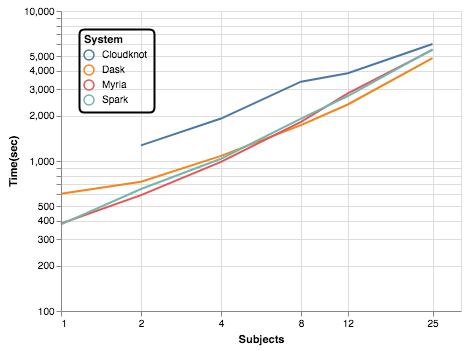

In [9]:
import altair as alt
from vega_datasets import data

c = alt.Chart(results).mark_line()
c.encode(
    alt.X("Subjects:Q", scale=alt.Scale(base=2, type="log"), 
         axis=alt.Axis(values=[0, 1, 2, 4, 8, 12, 25])),
    alt.Y('Time(sec):Q', scale=alt.Scale(base=10, type="log")),
    color=alt.Color('System', legend=alt.Legend(orient="bottom-right", 
                                                title="System"))
    ).configure_legend(strokeColor='black', strokeWidth=2, cornerRadius=5,
                       padding=5)

In [10]:
s = results[results["Subjects"]==25]["Time(sec)"]

In [11]:
s.loc[29] / s

11    1.243196
17    1.092616
23    1.087414
29    1.000000
Name: Time(sec), dtype: float64